In [1]:
using Thebes, Luxor, LightXML

In [2]:
struct Colors
    background
    foreground
end
c = Colors("white", "black");

In [3]:
function pointmass(p3d, p2d, pointradius)
    circle(p2d, pointradius, :fill)
    return nothing
end

function shortenvector(startpoint::Point, endpoint::Point; shortenstart=0, shortenend=0)
    length = distance(startpoint, endpoint)
    unitvector = (endpoint - startpoint) / length
    new_start_point = startpoint + unitvector * shortenstart / length
    new_end_point = new_start_point + (length - shortenend) * unitvector
    return new_start_point, new_end_point
end

function vectorfromorigin(p3d, p2d, shortenend)
    new_start_point, new_end_point = shortenvector(first(p2d), last(p2d), shortenend=shortenend)
    arrow(new_start_point, new_end_point, linewidth=linewidth)
    return nothing
end

function vectorbetweenpoints(p3d, p2d, shortenstart, shortenend)
    new_start_point, new_end_point = shortenvector(first(p2d), last(p2d), shortenstart=shortenstart, shortenend=shortenend)
    arrow(new_start_point, new_end_point, linewidth=linewidth)
    return nothing
end

function barymark(p3d, p2d)
    gsave()
    radius = 2 * pointradius
    setcolor(c.foreground)
    circle(p2d, radius, :stroke)
    pie(p2d, radius, pi/2, pi, :fill)
    pie(p2d, radius, 3pi/2, 2pi, :fill)
    setcolor("gray")
    pie(p2d, radius, 0, pi/2, :fill)
    pie(p2d, radius, pi, 3pi/2, :fill)
    grestore()
end;

In [4]:
O3D = Point3D(0, 0, 0)
O2D = pin(O3D, gfunction=(p3, p2) -> nothing)
pointradius = 3
linewidth = 2;

In [5]:
function textlabel!(parent, txt::AbstractString, pos::Point; xoffset::Number=0, yoffset::Number=0)
    x = pos.x + xoffset + top_left_corner.x
    y = pos.y + yoffset + top_left_corner.y
    elem = new_child(parent, "text")
    add_text(elem, txt)
    set_attributes(elem, Dict("class"=>"math", "x"=>string(x, "pt"), "y"=>string(y, "pt")))
    return nothing
end;

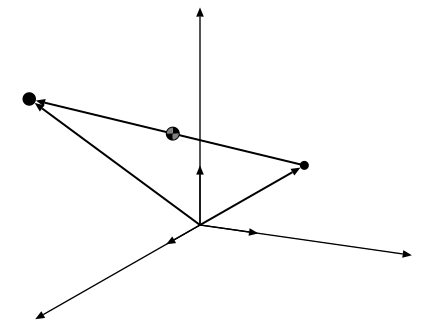

In [6]:
Drawing(425, 325, :svg)
# background(c.background)
origin(Point(200, 225))
helloworld()
eyepoint(600, 300, 200)
perspective(200)
# axes3D(600)

setcolor(c.foreground)
setline(linewidth)

# arrow doesn't respect setline
lw = linewidth / 1.5
X3D = Point3D(500, 0, 0)
Y3D = Point3D(0, 550, 0)
Z3D = Point3D(0, 0, 600)
scale = 200
I3D = X3D / distance(O3D, X3D) * scale
J3D = Y3D / distance(O3D, Y3D) * scale
K3D = Z3D / distance(O3D, Z3D) * scale
_, X = pin(O3D, X3D, gfunction=(_, p2d) -> arrow(first(p2d), last(p2d), linewidth=lw))
_, Y = pin(O3D, Y3D, gfunction=(_, p2d) -> arrow(first(p2d), last(p2d), linewidth=lw))
_, Z = pin(O3D, Z3D, gfunction=(_, p2d) -> arrow(first(p2d), last(p2d), linewidth=lw))
_, I = pin(O3D, I3D, gfunction=(_, p2d) -> arrow(first(p2d), last(p2d), linewidth=lw))
_, J = pin(O3D, J3D, gfunction=(_, p2d) -> arrow(first(p2d), last(p2d), linewidth=lw))
_, K = pin(O3D, K3D, gfunction=(_, p2d) -> arrow(first(p2d), last(p2d), linewidth=lw))

p1 = Point3D(300, 300, 200)
m1 = 1.5
r1 = pointradius * m1
loc1 = pin(p1, gfunction=(p3d, p2d) -> pointmass(p3d, p2d, r1))
pin(O3D, p1, gfunction=(p3d, p2d) -> vectorfromorigin(p3d, p2d, r1))

p2 = Point3D(500, 100, 250)
m2 = 2.25
r2 = pointradius * m2
loc2 = pin(p2, gfunction=(p3d, p2d) -> pointmass(p3d, p2d, r2))
pin(O3D, p2, gfunction=(p3d, p2d) -> vectorfromorigin(p3d, p2d, r2))

pin(p1, p2, gfunction=(p3d, p2d) -> vectorbetweenpoints(p3d, p2d, r1, r2))

barycenter = (m1 * p1 + m2 * p2) / (m1 + m2)
COG = pin(barycenter, gfunction=barymark)

top_left_corner = getworldposition(Point(0, 0), centered=false)
finish()
preview()

In [7]:
svg_out = svgstring();
xdoc = parse_string(svg_out)
xroot = root(xdoc);

In [8]:
textlabel!(xroot, "m_1", loc1, xoffset=-70, yoffset=-40)
textlabel!(xroot, "m_2", loc2, xoffset=-30, yoffset=-25)
textlabel!(xroot, "\\boldsymbol{R}_1", midpoint(O2D, loc1), xoffset=-50, yoffset=-50)
textlabel!(xroot, "\\boldsymbol{R}_2", midpoint(O2D, loc2), xoffset=-55, yoffset=-50)
textlabel!(xroot, "\\boldsymbol{r}", between(loc1, loc2, 0.3), xoffset=-50, yoffset=-50)
textlabel!(xroot, "\\mathrm{COG}", COG, xoffset=-55, yoffset=-50)
textlabel!(xroot, "X", X, yoffset=-105)
textlabel!(xroot, "Y", Y, xoffset=-125, yoffset=-80)
textlabel!(xroot, "Z", Z, xoffset=-45)
textlabel!(xroot, "\\boldsymbol{\\hat{I}}", midpoint(O2D, I), xoffset=-50, yoffset=-50)
textlabel!(xroot, "\\boldsymbol{\\hat{J}}", midpoint(O2D, J), xoffset=-50, yoffset=-50)
textlabel!(xroot, "\\boldsymbol{\\hat{K}}", between(O2D, K, 0.7), xoffset=-50, yoffset=-50);

In [9]:
save_file(xdoc, "../raw_svg/two-point-masses.svg");